In [1]:
#include <fstream>
#include <cstdlib>

In [2]:
gROOT->ProcessLine(".x Lib.C");

(int) 0


In [3]:
/*Variables names*/
std::string Var1="MuonMultiplicity";
//std::string Var1="bJetsMultiplicity";
//std::string Var1="@AnaMuons.size()";
std::string Var2="AnaMuons.Pt()";
std::string Var3="MT_LeadingMuon_MET";
std::string Var4="@AnaJets.size()";
std::string Var5="AnaMET.Mt()";

In [4]:
Harry::Plotter *MuSize = new Harry::Plotter("demo/VLFTree",{Var1},4,0,4);
//Harry::Plotter *MuSize = new Harry::Plotter("demo/VLFTree",{"@AnaMuons.size()"},6,0,6);
Harry::Plotter *MuPt = new Harry::Plotter ("demo/VLFTree",{Var2},20,0,60);
Harry::Plotter *Mt = new Harry::Plotter("demo/VLFTree",{Var3},30,0,90); 
Harry::Plotter *JetSize = new Harry::Plotter("demo/VLFTree",{Var4},10,0,10);
Harry::Plotter *METMt = new Harry::Plotter("demo/VLFTree",{Var5},68,60,400);
//p.SetVerbose(true);

In [5]:
std::vector<Harry::Plotter *> PlotVec;
PlotVec.push_back(MuSize);
PlotVec.push_back(MuPt);
PlotVec.push_back(Mt);
PlotVec.push_back(JetSize);
PlotVec.push_back(METMt);

In [6]:
for(auto p: PlotVec) {
    p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/Signal.root","Signal",0.331);
//DY
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/DYJetsToLL_HT/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/",
        "DY",1.318077913);
//Single Top
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_s-channel_4f_leptonDecays_13TeV-amcatnlo-pythia8_TuneCUETP8M1",
        "ST",0.336);//30
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_t-channel_antitop_4f_inclusiveDecays_TuneCUETP8M2T4_13TeV-powhegV2-madspin",
        "ST",0.2658808098);//30
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_t-channel_top_4f_inclusiveDecays_TuneCUETP8M2T4_13TeV-powhegV2-madspin",
        "ST",0.2658808098);//45
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_tW_antitop_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M1",
        "ST",0.2743065568);//120
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_tW_top_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M1",
        "ST",0.2743065568);
//TT
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/TTToLL_MLL/TT_TuneCUETP8M2T4_13TeV-powheg-pythia8",
        "TT",1.07907048);
//W+Jets
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-70To100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",163.713);//max20000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",16.12246515);//max 160000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.5484566297);//4000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.1491425684);//200
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-600To800_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.1879002812);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-800To1200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.03561855317);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-1200To2500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.02339910957);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-2500ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.001475217613); //max
    
}

In [7]:
TCanvas c;

In [8]:
std::map<std::string, std::map<std::string, Double_t> > CutFlow;
//Map to count events
std::map<std::string, Double_t> temp;

In [9]:
//Cuts
std::string cut0 = "MuonMultiplicity==1&&bJetsMultiplicity==0";
//std::string cut0 = "@AnaMuons.size()==1&&bJetsMultiplicity==0";
std::string cut1 = cut0+"&&AnaMuons.Pt()<30";
std::string cut2 = cut1+"&&MT_LeadingMuon_MET<65";
std::string cut3 = cut2+"&&@AnaJets.size()<3";

In [10]:
std::string SetCutName = "MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT65_JetsSizeLT3";
std::string PlotPath = "Plots_PDF/"+SetCutName;
Bool_t SaveFiles = kTRUE;
//Bool_t SaveFiles = kFALSE;

In [11]:
std::string cmdbash = "mkdir -p "+PlotPath;
const int dir_err =system(cmdbash.c_str());

In [12]:
cmdbash

(std::string &) "mkdir -p Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3"


## Muon Size

In [13]:
//Used for cross check
//MuSize->SetCut(cut0.c_str());

In [14]:
auto MuSize_hplots = MuSize->GetPlots();

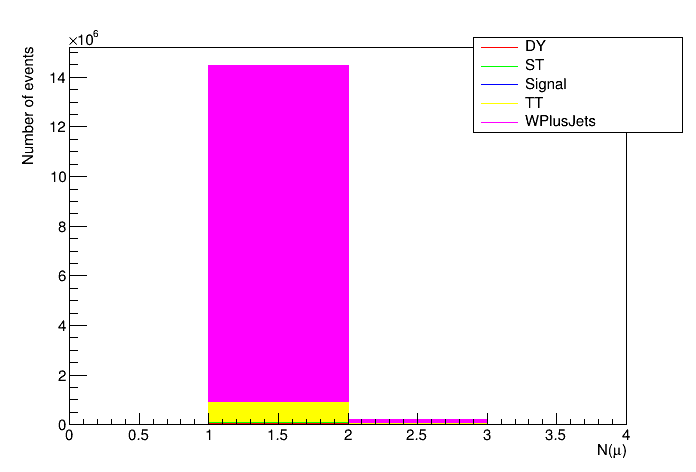

In [15]:
MuSize_hplots[Var1].first->Draw("Histo"); //HStack object
MuSize_hplots[Var1].first->GetXaxis()->SetTitle("N(#mu)");
MuSize_hplots[Var1].first->GetYaxis()->SetTitle("Number of events");
MuSize_hplots[Var1].first->SetTitle("");
MuSize_hplots[Var1].second->Draw(); //Legend object
c.Draw();

In [16]:
std::string PlotPathName = PlotPath +"/MuSizeStack.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MuSizeStack.pdf has been created


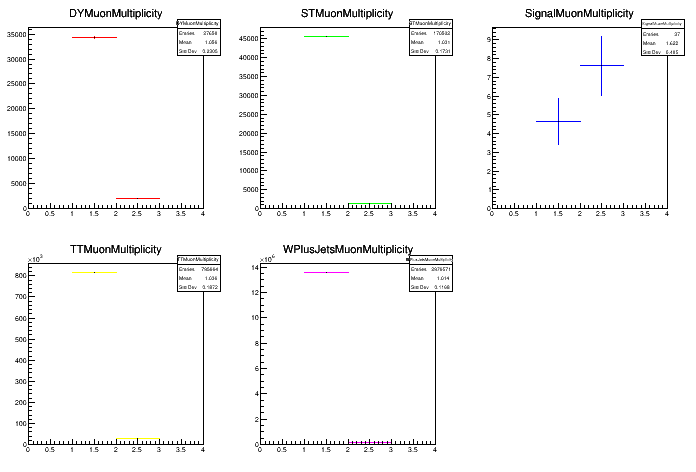

In [17]:
MuSize_hplots[Var1].first->Draw("PADS"); //HStack object
MuSize_hplots[Var1].first->SetTitle("");
MuSize_hplots[Var1].second->Draw(); //Legend object
c.Draw();

In [18]:
PlotPathName = PlotPath +"/MuSizeAll.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MuSizeAll.pdf has been created


### Significance

In [19]:
auto MuSizeHist=MuSize->GetHists();

In [20]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundMuS;
BackgroundMuS.push_back((TH1D *)MuSizeHist[Var1].first.at(0));
BackgroundMuS.push_back((TH1D *)MuSizeHist[Var1].first.at(1));
BackgroundMuS.push_back((TH1D *)MuSizeHist[Var1].first.at(3));
BackgroundMuS.push_back((TH1D *)MuSizeHist[Var1].first.at(4));

In [21]:
temp["DY"]=MuSizeHist[Var1].first.at(0)->Integral();
temp["ST"]=MuSizeHist[Var1].first.at(1)->Integral();
temp["TT"]=MuSizeHist[Var1].first.at(3)->Integral();
temp["WJ"]=MuSizeHist[Var1].first.at(4)->Integral();
temp["Signal"]=MuSizeHist[Var1].first.at(2)->Integral();

In [22]:
//MuSizeHist[Var1].first.at(2)->Integral()

nocut= 1000.9361
cut0 = 1730.0000
cut1 = 5834.0000
cut2 =
cut3 =

In [23]:
CutFlow["Cut0"]=temp;

In [24]:
//temp["TT"]
//CutFlow["Cut0"]

In [25]:
Significance Muon_Size_TH=Significance((TH1D *)MuSizeHist[Var1].first.at(2),BackgroundMuS);
TH1D * Muon_Size_THDraw=Muon_Size_TH.GetSigLessThan();

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


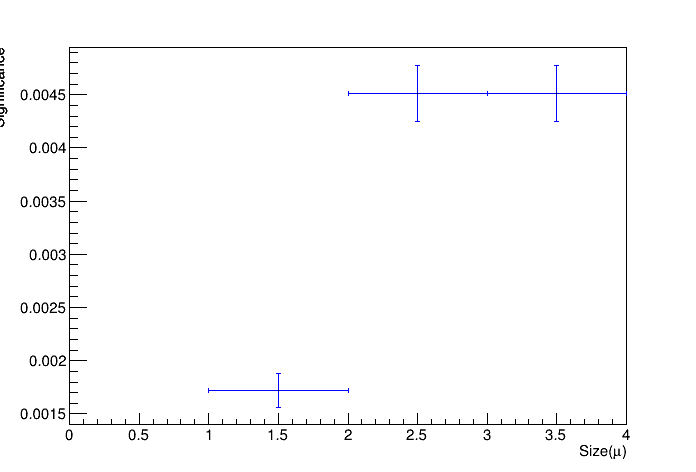

In [26]:
Muon_Size_THDraw->Draw("E1");
Muon_Size_THDraw->SetTitle("");
Muon_Size_THDraw->GetXaxis()->SetTitle("Size(#mu)");
Muon_Size_THDraw->GetYaxis()->SetTitle("Significance");
c.Draw();

In [27]:
PlotPathName = PlotPath +"/MuSizeSignificance.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MuSizeSignificance.pdf has been created


### efficency plots

In [28]:
//Get The efficency plots
std::vector<TH1D *> Muon_Size_Eff_THDraw = Muon_Size_TH.GetEffLessThan();

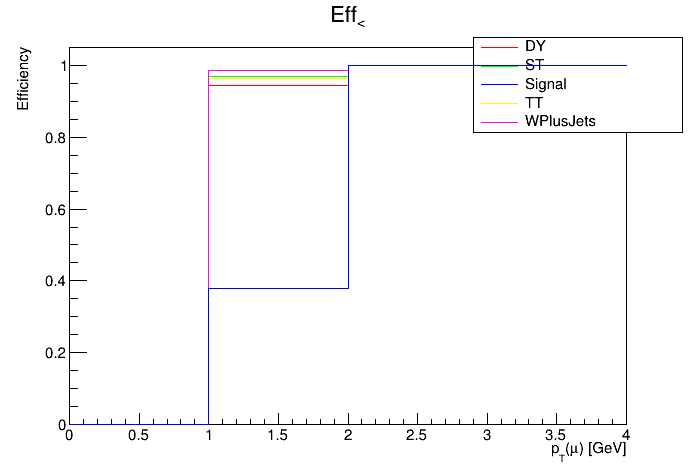

In [29]:
//Muon_Pt_Eff_THDraw[0]->SetFillStyle(4050);
Muon_Size_Eff_THDraw[0]->SetFillColor(0);
Muon_Size_Eff_THDraw[0]->Draw("E");
Muon_Size_Eff_THDraw[0]->SetTitle("Eff_{<}");
Muon_Size_Eff_THDraw[0]->GetXaxis()->SetTitle("p_{T}(#mu) [GeV]");
Muon_Size_Eff_THDraw[0]->GetYaxis()->SetTitle("Efficiency");
MuSize_hplots[Var1].second->Draw(); //Legend object
//Muon_Pt_Eff_THDraw[1]->SetFillStyle(4050);
Muon_Size_Eff_THDraw[1]->SetFillColor(0);
Muon_Size_Eff_THDraw[1]->Draw("same E");
//Muon_Pt_Eff_THDraw[2]->SetFillStyle(4050);
Muon_Size_Eff_THDraw[2]->SetFillColor(0);
Muon_Size_Eff_THDraw[2]->Draw("same E");
//Muon_Pt_Eff_THDraw[3]->SetFillStyle(4050);
Muon_Size_Eff_THDraw[3]->SetFillColor(0);
Muon_Size_Eff_THDraw[3]->Draw("same E");
//Muon_Pt_Eff_THDraw[4]->SetFillStyle(4050);
Muon_Size_Eff_THDraw[4]->SetFillColor(0);
Muon_Size_Eff_THDraw[4]->Draw("same E");
c.Draw();

In [30]:
PlotPathName = PlotPath +"/MuSizeEff.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MuSizeEff.pdf has been created


## $p_T(\mu)$

In [31]:
MuPt->SetCut(cut0.c_str());

In [32]:
auto MuPt_hplots = MuPt->GetPlots();

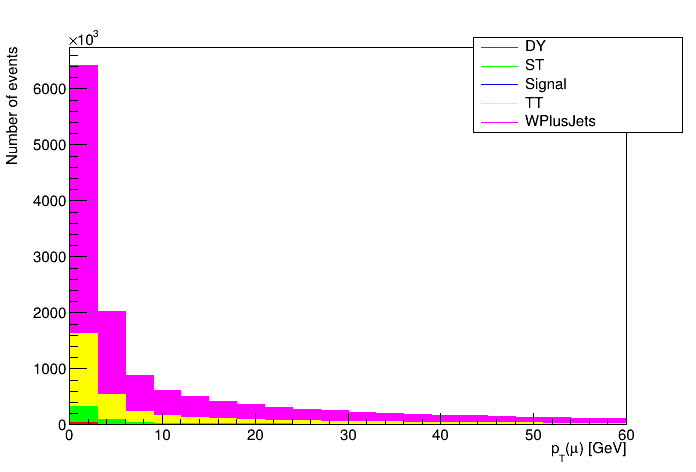

In [33]:
MuPt_hplots[Var2].first->Draw("Histo"); //HStack object
MuPt_hplots[Var2].first->GetXaxis()->SetTitle("p_{T}(#mu) [GeV]");
MuPt_hplots[Var2].first->GetYaxis()->SetTitle("Number of events");
MuPt_hplots[Var2].first->SetTitle("");
MuPt_hplots[Var2].second->Draw(); //Legend object
c.Draw();

In [34]:
PlotPathName = PlotPath +"/MuPtStack.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MuPtStack.pdf has been created


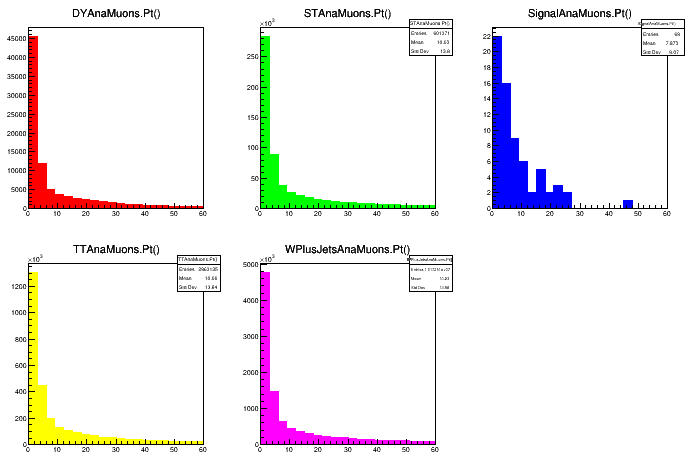

In [35]:
MuPt_hplots[Var2].first->GetXaxis()->SetTitle("p_{T}(#mu) [GeV]");
MuPt_hplots[Var2].first->GetYaxis()->SetTitle("Number of events");
MuPt_hplots[Var2].first->SetTitle("");
MuPt_hplots[Var2].first->Draw("PADS"); //HStack object
MuPt_hplots[Var2].second->Draw(); //Legend object
c.Draw();

In [36]:
PlotPathName = PlotPath +"/MuPtAll.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MuPtAll.pdf has been created


### Significance

In [37]:
auto MuPtHist = MuPt->GetHists();

In [38]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundMuPt;
BackgroundMuPt.push_back((TH1D *)MuPtHist[Var2].first.at(0));
BackgroundMuPt.push_back((TH1D *)MuPtHist[Var2].first.at(1));
BackgroundMuPt.push_back((TH1D *)MuPtHist[Var2].first.at(3));
BackgroundMuPt.push_back((TH1D *)MuPtHist[Var2].first.at(4));

In [39]:
temp["DY"]=MuPtHist[Var2].first.at(0)->Integral();
temp["ST"]=MuPtHist[Var2].first.at(1)->Integral();
temp["TT"]=MuPtHist[Var2].first.at(3)->Integral();
temp["WJ"]=MuPtHist[Var2].first.at(4)->Integral();
temp["Signal"]=MuPtHist[Var2].first.at(2)->Integral();

In [40]:
CutFlow["Cut1"]=temp;

In [41]:
//CutFlow["Cut1"]

In [42]:
Significance Muon_Pt_TH=Significance((TH1D *)MuPtHist[Var2].first.at(2),BackgroundMuPt);
TH1D * Muon_Pt_THDraw=Muon_Pt_TH.GetSigLessThan();

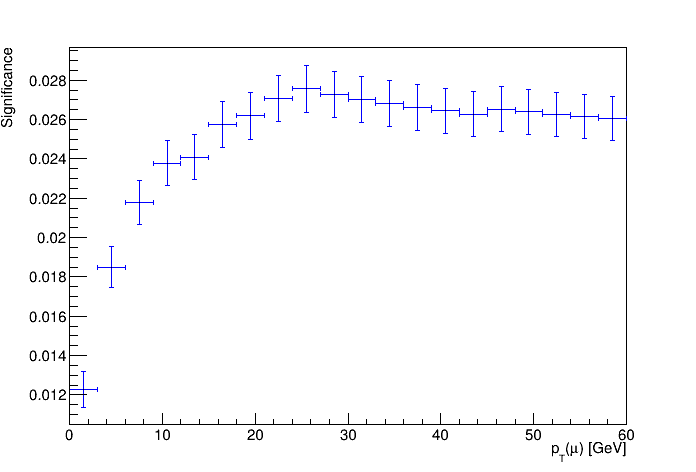

In [43]:
Muon_Pt_THDraw->Draw("E1");
Muon_Pt_THDraw->SetTitle("");
Muon_Pt_THDraw->GetXaxis()->SetTitle("p_{T}(#mu) [GeV]");
Muon_Pt_THDraw->GetYaxis()->SetTitle("Significance");
c.Draw();

In [44]:
PlotPathName = PlotPath +"/MuPtSignificance.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MuPtSignificance.pdf has been created


### efficency plots

In [45]:
//Get The efficency plots
std::vector<TH1D *> Muon_Pt_Eff_THDraw = Muon_Pt_TH.GetEffLessThan();

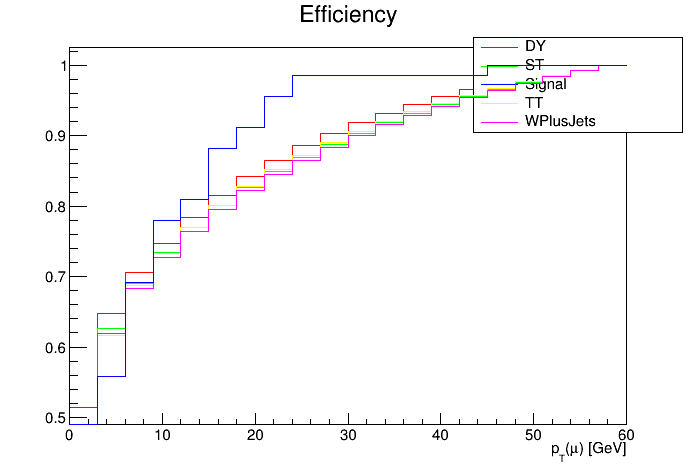

In [46]:
Muon_Pt_Eff_THDraw[0]->SetFillColor(0);
Muon_Pt_Eff_THDraw[0]->Draw("E");
Muon_Pt_Eff_THDraw[0]->GetXaxis()->SetTitle("p_{T}(#mu) [GeV]");
Muon_Pt_Eff_THDraw[0]->GetYaxis()->SetTitle("");
MuPt_hplots["AnaMuons.Pt()"].second->Draw(); //Legend object;
Muon_Pt_Eff_THDraw[1]->SetFillColor(0);
Muon_Pt_Eff_THDraw[1]->Draw("same E");
Muon_Pt_Eff_THDraw[2]->SetFillColor(0);
Muon_Pt_Eff_THDraw[2]->Draw("same E");
Muon_Pt_Eff_THDraw[3]->SetFillColor(0);
Muon_Pt_Eff_THDraw[3]->Draw("same E");
Muon_Pt_Eff_THDraw[4]->SetFillColor(0);
Muon_Pt_Eff_THDraw[4]->Draw("same E");
c.Draw();

In [47]:
PlotPathName = PlotPath +"/MuPtEff.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MuPtEff.pdf has been created


## $M_{T}(\mu,p_{T}^{miss})$

In [48]:
Mt->SetCut(cut1.c_str());

In [49]:
auto Mt_hplots = Mt->GetPlots();

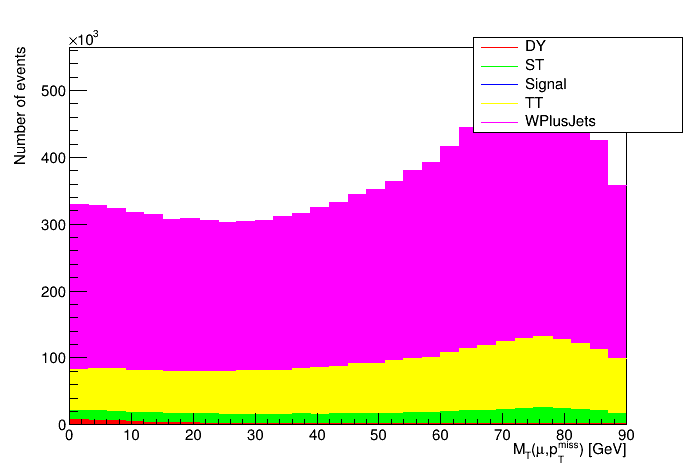

In [50]:
Mt_hplots["MT_LeadingMuon_MET"].first->Draw("Histo"); //HStack object
Mt_hplots["MT_LeadingMuon_MET"].first->GetXaxis()->SetTitle("M_{T}(#mu,p_{T}^{miss}) [GeV]");
Mt_hplots["MT_LeadingMuon_MET"].first->GetYaxis()->SetTitle("Number of events");
Mt_hplots["MT_LeadingMuon_MET"].first->SetTitle("");
Mt_hplots["MT_LeadingMuon_MET"].second->Draw(); //Legend object
c.Draw();

In [51]:
PlotPathName = PlotPath +"/MtStack.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MtStack.pdf has been created


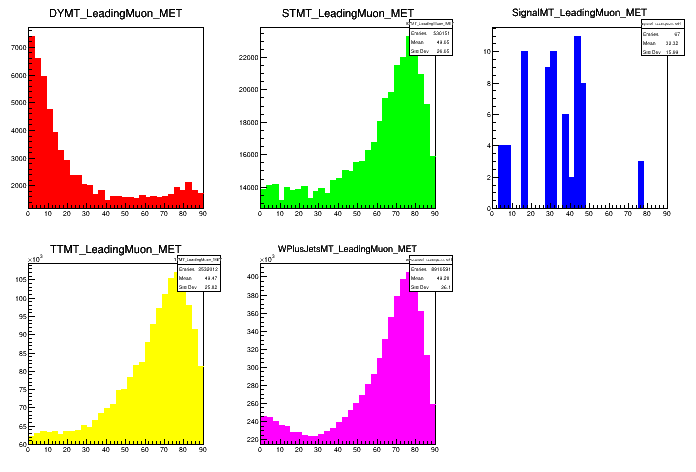

In [52]:
Mt_hplots["MT_LeadingMuon_MET"].first->Draw("PADS"); //HStack object
Mt_hplots["MT_LeadingMuon_MET"].first->SetTitle("");
Mt_hplots["MT_LeadingMuon_MET"].second->Draw(); //Legend object
c.Draw();

In [53]:
PlotPathName = PlotPath +"/MtAll.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MtAll.pdf has been created


### Significance

In [54]:
auto MtHist = Mt->GetHists();

In [55]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundMt;
BackgroundMt.push_back((TH1D *)MtHist["MT_LeadingMuon_MET"].first.at(0));
BackgroundMt.push_back((TH1D *)MtHist["MT_LeadingMuon_MET"].first.at(1));
BackgroundMt.push_back((TH1D *)MtHist["MT_LeadingMuon_MET"].first.at(3));
BackgroundMt.push_back((TH1D *)MtHist["MT_LeadingMuon_MET"].first.at(4));

In [56]:
temp["DY"]=MtHist["MT_LeadingMuon_MET"].first.at(0)->Integral();
temp["ST"]=MtHist["MT_LeadingMuon_MET"].first.at(1)->Integral();
temp["TT"]=MtHist["MT_LeadingMuon_MET"].first.at(3)->Integral();
temp["WJ"]=MtHist["MT_LeadingMuon_MET"].first.at(4)->Integral();
temp["Signal"]=MtHist["MT_LeadingMuon_MET"].first.at(2)->Integral();

In [57]:
CutFlow["Cut2"]=temp;

In [58]:
//CutFlow["Cut2"]

In [59]:
Significance Mt_TH=Significance((TH1D *)MtHist["MT_LeadingMuon_MET"].first.at(2),BackgroundMt);
TH1D * Mt_THDraw=Mt_TH.GetSigLessThan();

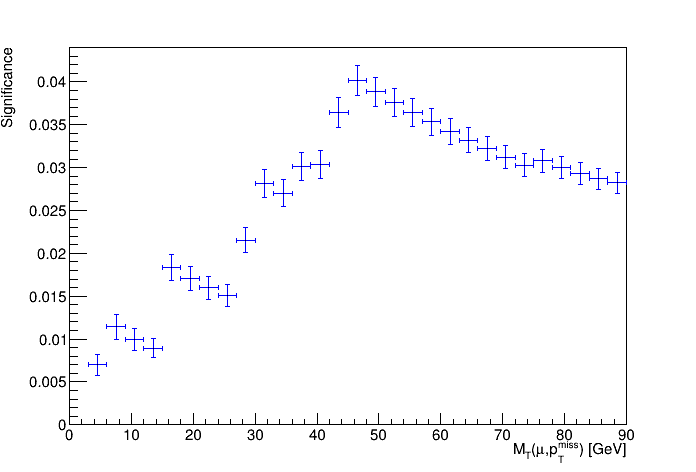

In [60]:
Mt_THDraw->Draw("E1");
Mt_THDraw->SetTitle("");
Mt_THDraw->GetXaxis()->SetTitle("M_{T}(#mu,p_{T}^{miss}) [GeV]");
Mt_THDraw->GetYaxis()->SetTitle("Significance");
c.Draw();

In [61]:
PlotPathName = PlotPath +"/MtSignificance.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MtSignificance.pdf has been created


### Efficiency

In [62]:
//Get The efficency plots
std::vector<TH1D *> Mt_Eff_THDraw = Mt_TH.GetEffLessThan();

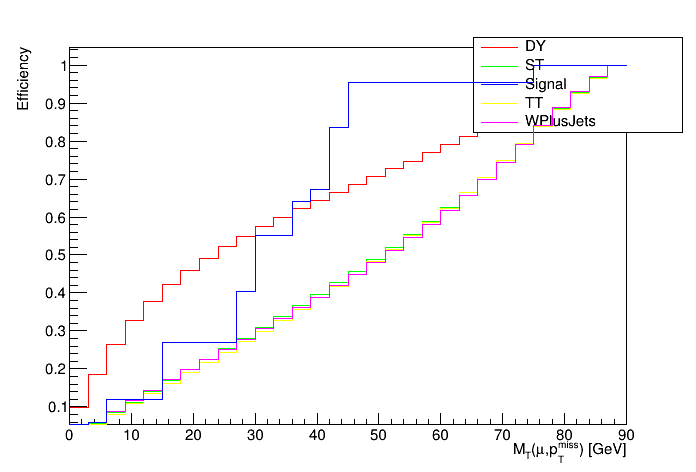

In [63]:
Mt_Eff_THDraw[0]->SetFillColor(0);
Mt_Eff_THDraw[0]->Draw("E");
Mt_Eff_THDraw[0]->SetTitle("");
Mt_Eff_THDraw[0]->GetXaxis()->SetTitle("M_{T}(#mu,p_{T}^{miss}) [GeV]");
Mt_Eff_THDraw[0]->GetYaxis()->SetTitle("Efficiency");
Mt_hplots["MT_LeadingMuon_MET"].second->Draw(); //Legend object
Mt_Eff_THDraw[1]->SetFillColor(0);
Mt_Eff_THDraw[1]->Draw("same E");
Mt_Eff_THDraw[2]->SetFillColor(0);
Mt_Eff_THDraw[2]->Draw("same E");
Mt_Eff_THDraw[3]->SetFillColor(0);
Mt_Eff_THDraw[3]->Draw("same E");
Mt_Eff_THDraw[4]->SetFillColor(0);
Mt_Eff_THDraw[4]->Draw("same E");
c.Draw();

In [64]:
PlotPathName = PlotPath +"/MtEff.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/MtEff.pdf has been created


## $N(Jet)$

In [65]:
JetSize->SetCut(cut2.c_str());

In [66]:
auto JetSize_hplots = JetSize->GetPlots();

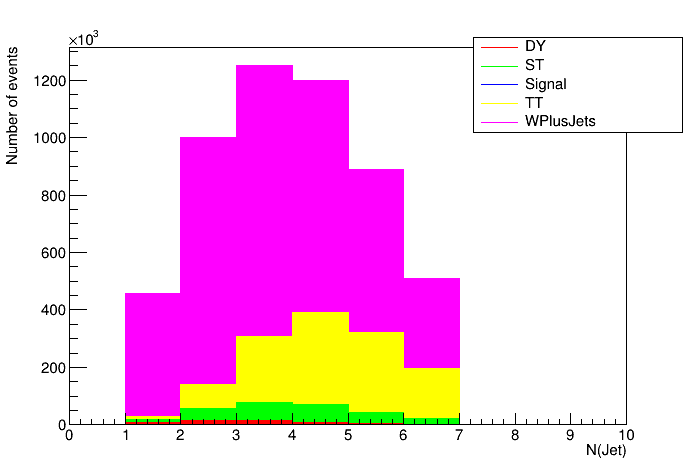

In [67]:
JetSize_hplots["@AnaJets.size()"].first->Draw("Histo"); //HStack object
JetSize_hplots["@AnaJets.size()"].first->GetXaxis()->SetTitle("N(Jet)");
JetSize_hplots["@AnaJets.size()"].first->GetYaxis()->SetTitle("Number of events");
JetSize_hplots["@AnaJets.size()"].first->SetTitle("");
JetSize_hplots["@AnaJets.size()"].second->Draw(); //Legend object
c.Draw();

In [68]:
PlotPathName = PlotPath +"/JetSizeStack.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/JetSizeStack.pdf has been created


### Significance

In [69]:
auto JetSizeHist = JetSize->GetHists();

In [70]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundJetSize;
BackgroundJetSize.push_back((TH1D *)JetSizeHist["@AnaJets.size()"].first.at(0));
BackgroundJetSize.push_back((TH1D *)JetSizeHist["@AnaJets.size()"].first.at(1));
BackgroundJetSize.push_back((TH1D *)JetSizeHist["@AnaJets.size()"].first.at(3));
BackgroundJetSize.push_back((TH1D *)JetSizeHist["@AnaJets.size()"].first.at(4));

In [71]:
temp["DY"]=JetSizeHist["@AnaJets.size()"].first.at(0)->Integral();
temp["ST"]=JetSizeHist["@AnaJets.size()"].first.at(1)->Integral();
temp["TT"]=JetSizeHist["@AnaJets.size()"].first.at(3)->Integral();
temp["WJ"]=JetSizeHist["@AnaJets.size()"].first.at(4)->Integral();
temp["Signal"]=JetSizeHist["@AnaJets.size()"].first.at(2)->Integral();

In [72]:
CutFlow["Cut3"]=temp;

In [73]:
//CutFlow["Cut3"]

In [74]:
Significance Jet_Size_TH=Significance((TH1D *)JetSizeHist["@AnaJets.size()"].first.at(2),BackgroundJetSize);
TH1D * Jet_Size_THDraw=Jet_Size_TH.GetSigLessThan();

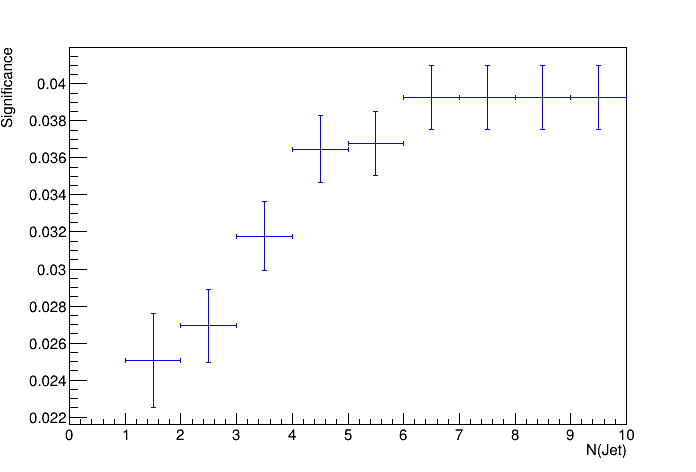

In [75]:
Jet_Size_THDraw->Draw("E1");
Jet_Size_THDraw->SetTitle("");
Jet_Size_THDraw->GetXaxis()->SetTitle("N(Jet)");
Jet_Size_THDraw->GetYaxis()->SetTitle("Significance");
c.Draw();

In [76]:
PlotPathName = PlotPath +"/JetSizeSignificance.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/JetSizeSignificance.pdf has been created


### Efficiency

In [77]:
//Get The efficency plots
std::vector<TH1D *> Jet_Size_Eff_THDraw = Jet_Size_TH.GetEffLessThan();

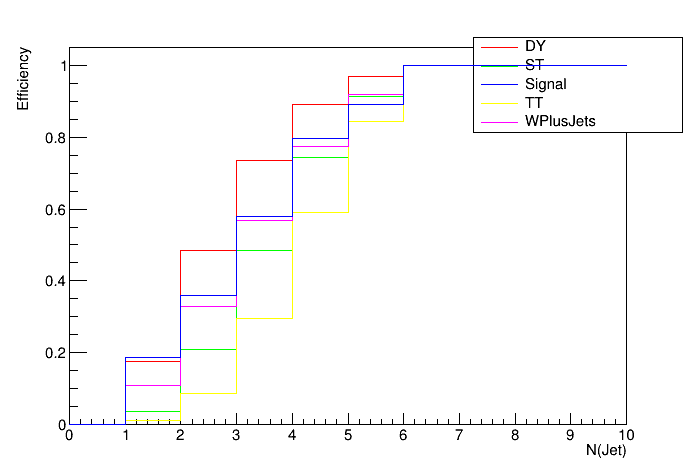

In [78]:
Jet_Size_Eff_THDraw[0]->SetFillColor(0);
Jet_Size_Eff_THDraw[0]->Draw("E");
Jet_Size_Eff_THDraw[0]->SetTitle("");
Jet_Size_Eff_THDraw[0]->GetXaxis()->SetTitle("N(Jet)");
Jet_Size_Eff_THDraw[0]->GetYaxis()->SetTitle("Efficiency");
JetSize_hplots["@AnaJets.size()"].second->Draw(); //Legend object
Jet_Size_Eff_THDraw[1]->SetFillColor(0);
Jet_Size_Eff_THDraw[1]->Draw("same E");
Jet_Size_Eff_THDraw[2]->SetFillColor(0);
Jet_Size_Eff_THDraw[2]->Draw("same E");
Jet_Size_Eff_THDraw[3]->SetFillColor(0);
Jet_Size_Eff_THDraw[3]->Draw("same E");
Jet_Size_Eff_THDraw[4]->SetFillColor(0);
Jet_Size_Eff_THDraw[4]->Draw("same E");
c.Draw();

In [79]:
PlotPathName = PlotPath +"/JetSizeEff.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file Plots_PDF/MuonEQ1_bJetsEQ0_MuonsPtLT30_MTLMuonMETLT50_JetsSizeLT3/JetSizeEff.pdf has been created


##  $M_T(MET)$

In [80]:
METMt->SetCut(cut3.c_str());

In [81]:
auto METMt_hplots = METMt->GetPlots();

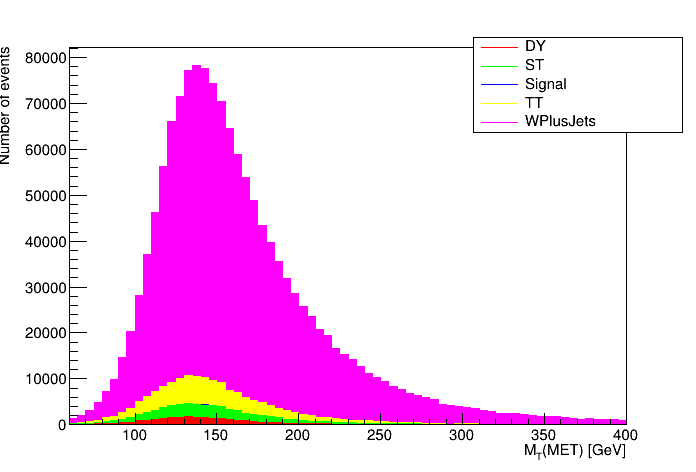

In [82]:
METMt_hplots["AnaMET.Mt()"].first->Draw("Histo"); //HStack object
METMt_hplots["AnaMET.Mt()"].first->GetXaxis()->SetTitle("M_{T}(MET) [GeV]");
METMt_hplots["AnaMET.Mt()"].first->GetYaxis()->SetTitle("Number of events");
METMt_hplots["AnaMET.Mt()"].first->SetTitle("");
METMt_hplots["AnaMET.Mt()"].second->Draw(); //Legend object
c.Draw();

### Significance

In [83]:
auto METMtHist = METMt->GetHists();

In [84]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundMETMt;
BackgroundMETMt.push_back((TH1D *)METMtHist["AnaMET.Mt()"].first.at(0));
BackgroundMETMt.push_back((TH1D *)METMtHist["AnaMET.Mt()"].first.at(1));
BackgroundMETMt.push_back((TH1D *)METMtHist["AnaMET.Mt()"].first.at(3));
BackgroundMETMt.push_back((TH1D *)METMtHist["AnaMET.Mt()"].first.at(4));

In [85]:
temp["DY"]=METMtHist["@AnaJets.size()"].first.at(0)->Integral();
temp["ST"]=METMtHist["@AnaJets.size()"].first.at(1)->Integral();
temp["TT"]=METMtHist["@AnaJets.size()"].first.at(3)->Integral();
temp["WJ"]=METMtHist["@AnaJets.size()"].first.at(4)->Integral();
temp["Signal"]=METMtHist["@AnaJets.size()"].first.at(2)->Integral();

In [86]:
CutFlow["Final"]=temp;

In [87]:
// Create a map iterator and point to beginning of map
std::string FileName = PlotPath +"/Cutflow.dat";
ofstream myfile (FileName.c_str());
std::map<std::string, std::map<std::string, Double_t> >::iterator it = CutFlow.begin();
 
// Iterate over the map using Iterator till end.
while (it != CutFlow.end())
{
    // Accessing KEY from element pointed by it.
    std::string Cut = it->first;
    std::cout<< "-------------------------------" <<std::endl;
    std::cout<< "-----------" <<Cut << "----------------" <<std::endl;
    std::cout<< "-------------------------------" <<std::endl;
    //File
    myfile<< "-------------------------------" <<std::endl;
    myfile<< "-----------" <<Cut << "----------------" <<std::endl;
    myfile<< "-------------------------------" <<std::endl;
    
    

    // Accessing VALUE from element pointed by it.
    std::map<std::string, Double_t> map2 = it->second;
    
    // Create a map iterator and point to beginning of map
    std::map<std::string, Double_t>::iterator other = map2.begin();
    while (other != map2.end())
    {
        // Accessing KEY from element pointed by other.
        std::string sig = other->first;
        // Accessing VALUE from element pointed by it.
        int count = other->second;
        std::cout << "        " <<other->first << " ...... " << count <<std::endl;
        myfile << "        " <<other->first << " ...... " << count <<std::endl;
        // Increment the Iterator to point to next entry
        other++;
            
    }
    // Increment the Iterator to point to next entry
    it++;
}
myfile.close();

-------------------------------
-----------Cut0----------------
-------------------------------
        DY ...... 72910
        ST ...... 94199
        Signal ...... 24
        TT ...... 1696254
        WJ ...... 27564318
-------------------------------
-----------Cut1----------------
-------------------------------
        DY ...... 177720
        ST ...... 1194770
        Signal ...... 136
        TT ...... 5691862
        WJ ...... 20168180
-------------------------------
-----------Cut2----------------
-------------------------------
        DY ...... 151524
        ST ...... 982752
        Signal ...... 134
        TT ...... 4663284
        WJ ...... 16714106
-------------------------------
-----------Cut3----------------
-------------------------------
        DY ...... 105914
        ST ...... 469462
        Signal ...... 128
        TT ...... 2198086
        WJ ...... 7844962
-------------------------------
-----------Final----------------
-------------------------------
      